In [6]:
import pandas as pd

# Specify the file path
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

# Read the CSV file into a Pandas data frame
df = pd.read_csv(file_path)

print(df)

# 2. Generate the statistical description of all the features
description = df.describe(include='all')

print(description)


     Unnamed: 0.1  Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  \
0               0           0         Acer         4    2   1         5   
1               1           1         Dell         3    1   1         3   
2               2           2         Dell         3    1   1         7   
3               3           3         Dell         4    2   1         5   
4               4           4           HP         4    2   1         7   
..            ...         ...          ...       ...  ...  ..       ...   
233           233         233       Lenovo         4    2   1         7   
234           234         234      Toshiba         3    2   1         5   
235           235         235       Lenovo         4    2   1         5   
236           236         236       Lenovo         3    3   1         5   
237           237         237      Toshiba         3    2   1         5   

     Screen_Size_inch  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  \
0                14.

In [ ]:
file_path = r"C:\Users\Raegan\Downloads\GenerativeAI_DataInsights_XProj_Wranglind_EDA_Part3.csv"  #remname file
try:
    df.to_csv(file_path, index=False)
    print(f'DataFrame saved to {file_path}')
except Exception as e:
    print(f'An error occurred: {e}')

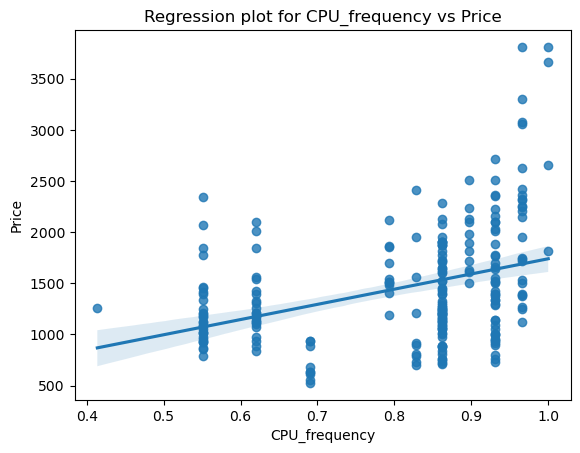

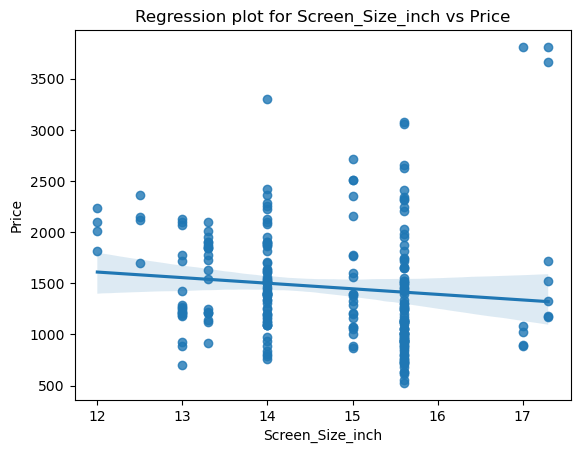

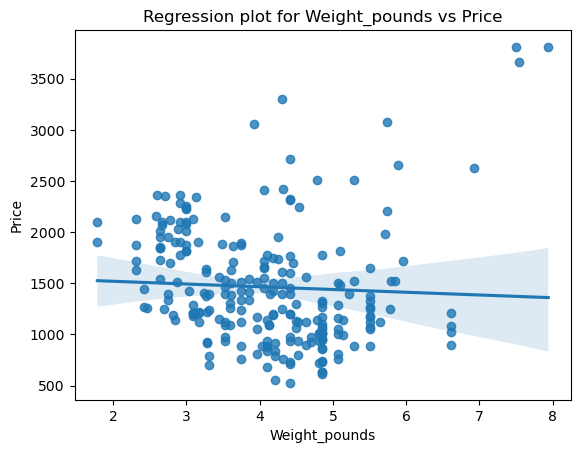

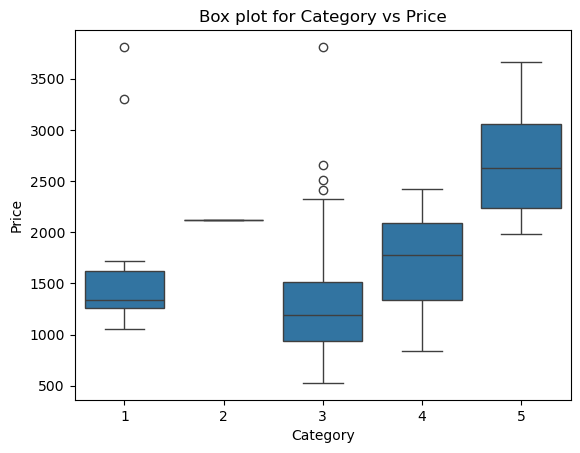

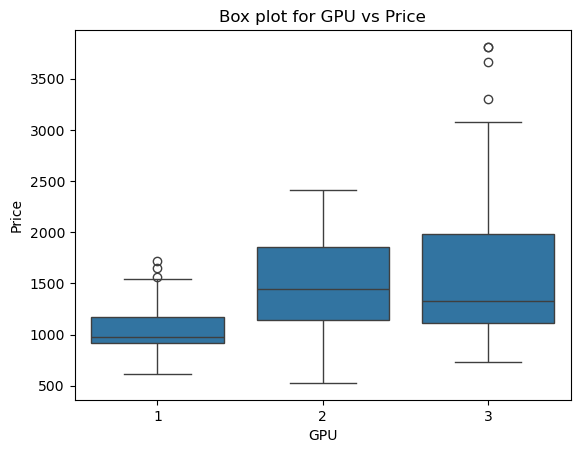

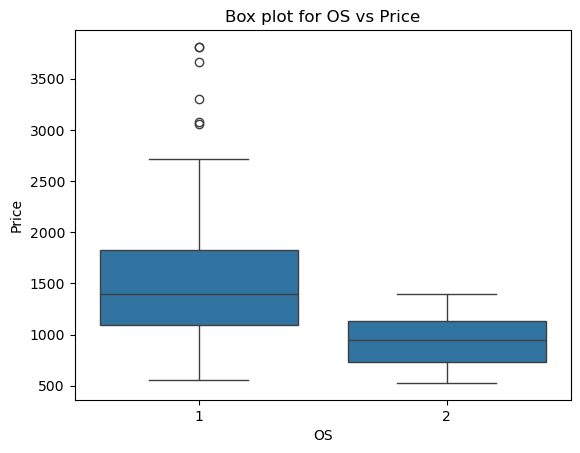

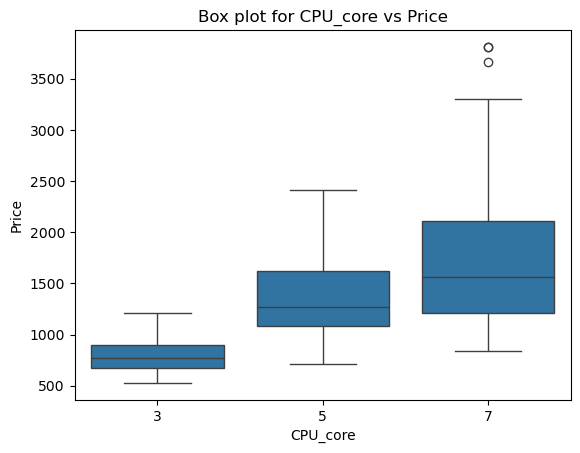

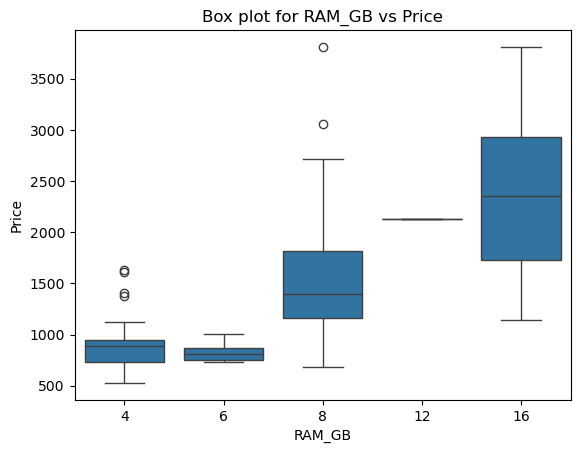

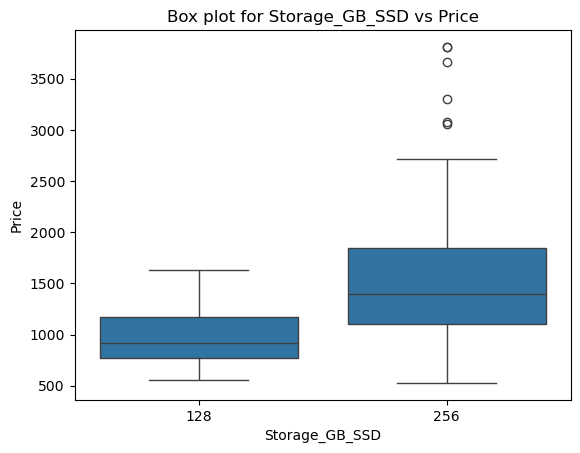

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=df)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=df)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})

# Print the results
print(results_df)

                         Attribute  Correlation Value  Pearson Coefficient  \
Unnamed: 0.1          Unnamed: 0.1           0.321933             0.321933   
Unnamed: 0              Unnamed: 0           0.321933             0.321933   
Category                  Category           0.286243             0.286243   
GPU                            GPU           0.288298             0.288298   
OS                              OS          -0.221730            -0.221730   
CPU_core                  CPU_core           0.459398             0.459398   
Screen_Size_inch  Screen_Size_inch          -0.110644            -0.110644   
CPU_frequency        CPU_frequency           0.366666             0.366666   
RAM_GB                      RAM_GB           0.549297             0.549297   
Storage_GB_SSD      Storage_GB_SSD           0.243421             0.243421   
Weight_pounds        Weight_pounds          -0.050312            -0.050312   
Screen-Full_HD      Screen-Full_HD          -0.021075           

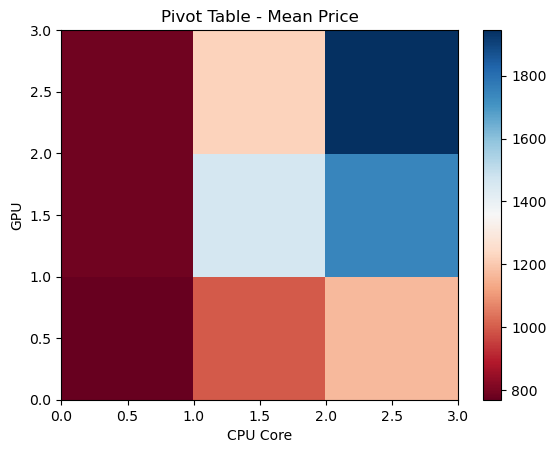

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()